## 설치 :mglearn

In [1]:
!pip install mglearn

DEPRECATION: Python 2.7 reached the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 is no longer maintained. pip 21.0 will drop support for Python 2.7 in January 2021. More details about Python 2 support in pip can be found at https://pip.pypa.io/en/latest/development/release-process/#python-2-support pip 21.0 will remove support for this functionality.
     |████████████████████████████████| 540 kB 17.5 MB/s eta 0:00:01
     |████████████████████████████████| 294 kB 73.4 MB/s eta 0:00:01
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582639 sha256=49e7118814631e686ab89c83a7866cf0f16f9bcd9d4edf91f1467f846df5d3d1
  Stored in directory: /home/ec2-user/.cache/pip/wheels/85/f3/f5/675bec4e4dea0e73b429a28c61747134c2cc1374d9427a5d15
Successfully built mglearn


# 1. K-means clustering
## A. 인위적으로 생성한 데이터셋
### 0) Import libraries

In [2]:
import mglearn

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

### 1) 데이터 생성과 클러스터링 시각화

In [3]:
X, y = make_blobs(random_state=1)

kmeans=KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [4]:
print "클러스터 레이블:\n{}".format(kmeans.labels_)

클러스터 레이블:
[0 2 2 2 1 1 1 2 0 0 2 2 1 0 1 1 1 0 2 2 1 2 1 0 2 1 1 0 0 1 0 0 1 0 2 1 2
 2 2 1 1 2 0 2 2 1 0 0 0 0 2 1 1 1 0 1 2 2 0 0 2 1 1 2 2 1 0 1 0 2 2 2 1 0
 0 2 1 1 0 2 0 2 2 1 0 0 0 0 2 0 1 0 0 2 2 1 1 0 1 0]


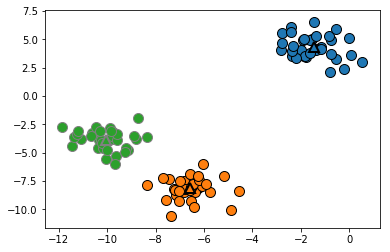

In [5]:
# 클러스터링 결과 시각화
mglearn.discrete_scatter(X[:,0],X[:,1],kmeans.labels_,markers='o')
mglearn.discrete_scatter(
kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],[0,1,2],
markers='^',markeredgewidth=2)

### 2) K에 따른 클러스터링 결과

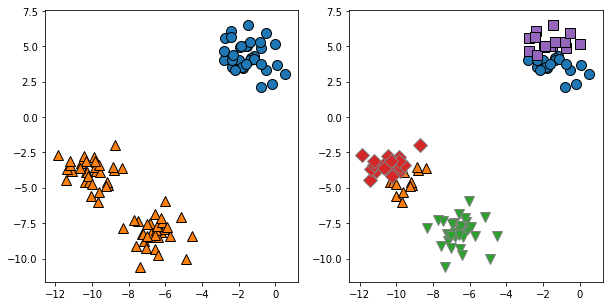

In [6]:
fig, axes=plt.subplots(1,2,figsize=(10,5))

#두 개의 클러스터 중심을 사용한다
kmeans=KMeans(n_clusters=2)
kmeans.fit(X)
assignments=kmeans.labels_
mglearn.discrete_scatter(X[:,0],X[:,1],assignments, ax=axes[0])

#다섯 개의 클러스터 중심을 사용한다
kmeans=KMeans(n_clusters=5)
kmeans.fit(X)
assignments=kmeans.labels_
mglearn.discrete_scatter(X[:,0],X[:,1],assignments, ax=axes[1])

### 3) 임의의 형태의 클러스터를 구분하지 못하는 K-means clustering 알고리즘

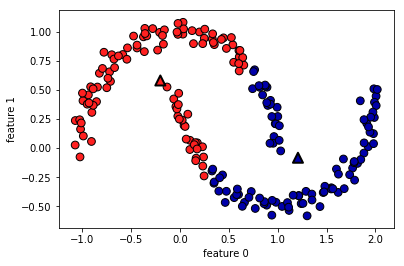

In [7]:
from sklearn.datasets import make_moons

X,y = make_moons(n_samples=200, noise=0.05, random_state=0)

# 두 개의 클러스터로 데이터에 K-means 알고리즘을 적용
kmeans=KMeans(n_clusters=2)
kmeans.fit(X)
y_pred=kmeans.predict(X)

#클러스터 할당과 클러스터 중심을 표시
plt.scatter(X[:,0],X[:,1],c=y_pred,cmap=mglearn.cm2,s=60,edgecolors='k')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],marker='^',
    c=[mglearn.cm2(0),mglearn.cm2(1)], s=100, linewidth=2, edgecolors='k')
plt.xlabel('feature 0')
plt.ylabel('feature 1')

plt.show()

## B. wine 성분에 따른 품종 클러스터링

In [8]:
import numpy as np
import pandas as pd

### 1) wine.csv 데이터 살펴보기

In [20]:
wine=pd.read_csv('wine.csv')
print(wine.shape)
print(wine.columns)

(178, 14)
Index([u'Class', u'Alcohol', u'Malic acid', u'Ash', u'Alcalinity of ash',
       u'Magnesium', u'Total phenols', u'Flavanoids', u'Nonflavanoid phenols',
       u'Proanthocyanins', u'Color intensity', u'Hue',
       u'OD280/OD315 of diluted wines', u'Proline'],
      dtype='object')


In [21]:
wine.head(5)

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


### 2) 클러스터링 수행(두개 속성만으로 클러스터링 해보기)

In [22]:
wine2=wine[['Class','Alcohol','Malic acid']]
wine2

,Class,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59
5,1,14.20,1.76
6,1,14.39,1.87
7,1,14.06,2.15
8,1,14.83,1.64
9,1,13.86,1.35


In [24]:
X=np.c_[wine2['Alcohol'],wine2['Malic acid']]
y=wine2['Class']
m=len(wine2)

#numpy array 형태로 변환
X=(np.array(X).reshape(m,2))
y=(np.array(y).reshape(m,1))
print X.shape, y.shape

(178, 2) (178, 1)


### 3) feature normalization

In [27]:
def featureNormalize(X):
    mu=np.mean(X,axis=0)
    std=np.std(X,axis=0)
    
    X_norm=(X-mu)/std
    
    return X_norm,mu,std

In [28]:
X,mu,std=featureNormalize(X)
print(X.shape)

(178, 2)


### 4. 클러스터링 수행

Text(0,0.5,'Malic acid')

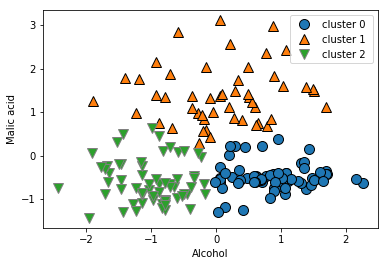

In [29]:
kmeans=KMeans(n_clusters=3)
kmeans.fit(X)

mglearn.discrete_scatter(X[:,0],X[:,1],kmeans.labels_)
plt.legend(['cluster 0', 'cluster 1 ', 'cluster 2'],loc='best')
plt.xlabel(wine2.columns[1])
plt.ylabel(wine2.columns[2])

### 5) 정답 레이블과 비교

[[51  7  1]
 [ 7 10 54]
 [ 8 33  7]]


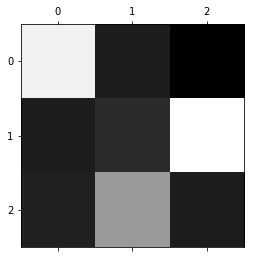

In [30]:
from sklearn.metrics import confusion_matrix
conf_mat=confusion_matrix(y.reshape(-1),kmeans.labels_+1)

print conf_mat
plt.matshow(conf_mat,cmap=plt.cm.gray)
plt.show()

In [31]:
print y.reshape(-1).shape
print kmeans.labels_.shape

(178,)
(178,)


In [32]:
print kmeans.labels_+1
print y.reshape(-1)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 2 1 2 1 2 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 1 3 3 3 1 3 1 3 3 1 1 1
 3 3 1 3 3 2 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3 3 2
 3 3 3 3 3 3 3 2 2 3 3 2 2 2 3 3 3 3 2 3 2 3 2 3 3 2 2 2 2 2 1 2 2 2 2 2 2
 2 2 2 2 1 2 3 2 2 2 1 1 2 2 2 2 1 2 2 2 1 2 3 3 1 2 2 2 1 2]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


In [36]:
from sklearn.metrics.cluster import silhouette_score
clusters=kmeans.fit_predict(X)
#silhouette_score(X,clusters)

0.484095893654603

# 2. Agglomerative clustring
### 0) Import libraries

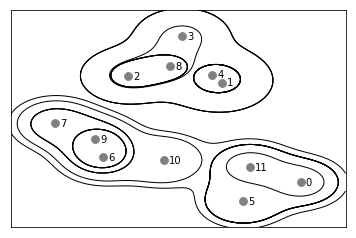

In [37]:
mglearn.plots.plot_agglomerative()

{'color_list': ['g', 'g', 'g', 'g', 'r', 'r', 'c', 'c', 'c', 'b', 'b'],
 'dcoord': [[0.0, 0.3320945047164902, 0.3320945047164902, 0.0],
  [0.0, 0.9268322277319817, 0.9268322277319817, 0.0],
  [0.0, 1.6004181164464242, 1.6004181164464242, 0.9268322277319817],
  [0.3320945047164902,
   2.078157949404743,
   2.078157949404743,
   1.6004181164464242],
  [0.0, 1.1803786988620995, 1.1803786988620995, 0.0],
  [0.0, 1.3031157463723073, 1.3031157463723073, 1.1803786988620995],
  [0.0, 0.6458019336639491, 0.6458019336639491, 0.0],
  [0.0, 1.4440338959892802, 1.4440338959892802, 0.6458019336639491],
  [0.0, 2.1598188624745154, 2.1598188624745154, 1.4440338959892802],
  [1.3031157463723073,
   6.550248535823649,
   6.550248535823649,
   2.1598188624745154],
  [2.078157949404743,
   7.924468768378964,
   7.924468768378964,
   6.550248535823649]],
 'icoord': [[5.0, 5.0, 15.0, 15.0],
  [35.0, 35.0, 45.0, 45.0],
  [25.0, 25.0, 40.0, 40.0],
  [10.0, 10.0, 32.5, 32.5],
  [65.0, 65.0, 75.0, 75.0],
  [55.

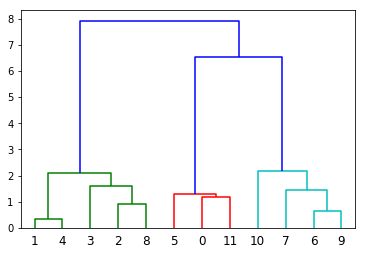

In [40]:
from scipy.cluster.hierarchy import dendrogram, ward

X,y =make_blobs(random_state=0, n_samples=12)
linkage_arr=ward(X)
dendrogram(linkage_arr)

Text(0,0.5,'distance between clusters')

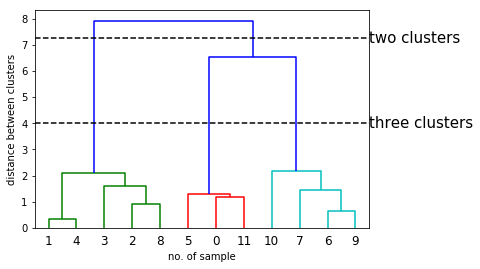

In [42]:
dendrogram(linkage_arr)
ax=plt.gca()
bounds=ax.get_xbound()
ax.plot(bounds,[7.25,7.25],'--',c='k')
ax.plot(bounds, [4,4],'--',c='k')

ax.text(bounds[1],7.25,'two clusters', va='center', fontdict={'size':15})
ax.text(bounds[1],4,'three clusters', va='center', fontdict={'size':15})

plt.xlabel("no. of sample")
plt.ylabel('distance between clusters')

# 3. DBSCAN
### 0) Import libraries

In [43]:
from sklearn.cluster import DBSCAN

### 1) 임의의 구형 데이터셋에 대한 DBSCAN

In [46]:
X,y =make_blobs(random_state=0, n_samples=12)

dbscan=DBSCAN()
clusters=dbscan.fit_predict(X)
print "클러스터 레이블:\n", clusters

클러스터 레이블:
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


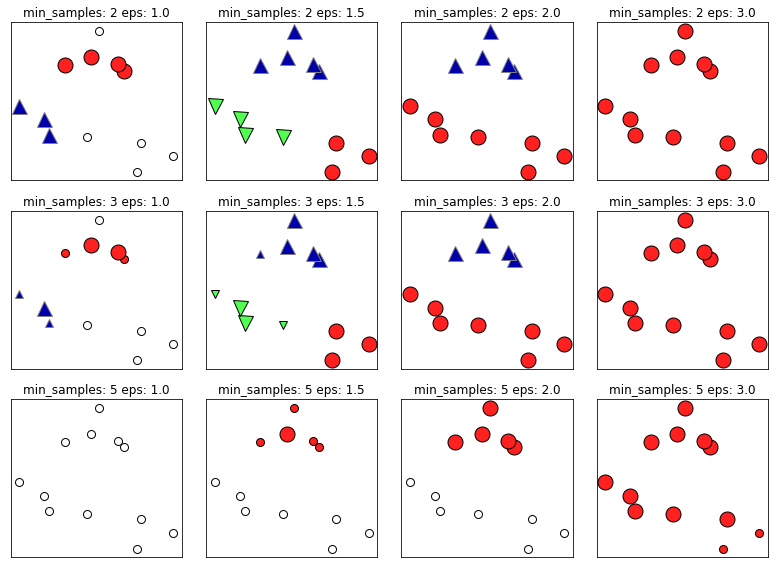

In [48]:
mglearn.plots.plot_dbscan()

### 2) 임의의 형태 데이터에 대한 DBSCAN

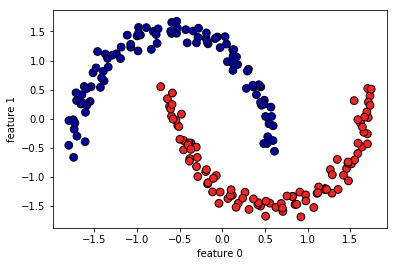

In [50]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler

X,y = make_moons(n_samples=200, noise=0.05, random_state=0)

# 두 개의 클러스터로 데이터에 K-means 알고리즘을 적용
scaler=StandardScaler()
scaler.fit(X)
X=scaler.transform(X)

dbscan=DBSCAN()
clusters=dbscan.fit_predict(X)

#클러스터 할당과 클러스터 중심을 표시
plt.scatter(X[:,0],X[:,1],c=clusters,cmap=mglearn.cm2,s=60,edgecolors='black')

plt.xlabel('feature 0')
plt.ylabel('feature 1')

plt.show()

### 3) 임의의 형태 데이터에 대한 {K-means, Agglomerative, DBSCAN} 클러스터링 알고리즘 비교

In [53]:
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.cluster import AgglomerativeClustering

X,y = make_moons(n_samples=200, noise=0.05, random_state=0)

scaler=StandardScaler()
scaler.fit(X)
X=scaler.transform(X)

cluster_algos=[KMeans(n_clusters=2),
              AgglomerativeClustering(n_clusters=2),
              DBSCAN()]

#비교를 위해 무작위로 클러스터 할당
random_state=np.random.RandomState(seed=0)
random_clusters=random_state.randint(low=0,high=2,size=len(X))

### 3-1) 타겟값(y) 이용한 평가(ARI, NMI)

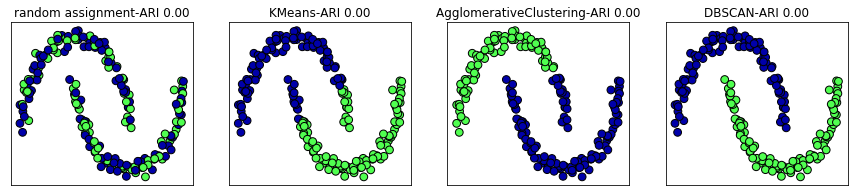

In [55]:
fig, axes=plt.subplots(1,4,figsize=(15,3),subplot_kw={'xticks':(), 'yticks':()})

axes[0].scatter(X[:,0],X[:,1],c=random_clusters,cmap=mglearn.cm3,s=60,edgecolors='black')
axes[0].set_title('random assignment-ARI {:.2f}'.format(adjusted_rand_score(y,random_clusters)))

for ax,algo in zip(axes[1:], cluster_algos):
    clusters=algo.fit_predict(X)
    ax.scatter(X[:,0],X[:,1],c=clusters,
              cmap=mglearn.cm3, s=60, edgecolors='black')
    ax.set_title('{}-ARI {:.2f}'.format(algo.__class__.__name__,adjusted_rand_score(y,random_clusters)))

### 3-2) 타겟값 없이 평가

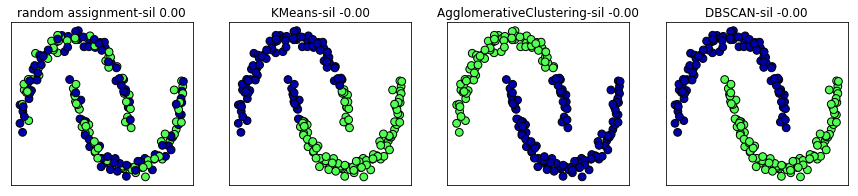

In [58]:
fig, axes=plt.subplots(1,4,figsize=(15,3),subplot_kw={'xticks':(), 'yticks':()})

axes[0].scatter(X[:,0],X[:,1],c=random_clusters,cmap=mglearn.cm3,s=60,edgecolors='black')
axes[0].set_title('random assignment-sil {:.2f}'.format(adjusted_rand_score(y,random_clusters)))

for ax,algo in zip(axes[1:], cluster_algos):
    clusters=algo.fit_predict(X)
    ax.scatter(X[:,0],X[:,1],c=clusters,
              cmap=mglearn.cm3, s=60, edgecolors='black')
    ax.set_title('{}-sil {:.2f}'.format(algo.__class__.__name__,silhouette_score(X,random_clusters)))